# **Dataset Selection**

In [ ]:
# prompt: download dataset

!pip install kaggle

# Download latest version
!kaggle datasets download -dprathamtripathi/drug-classification

# Print the path (the file will be in the current directory)
print("Path to dataset files: ./drug-classification.zip")
!unzip drug-classification.zip


Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
License(s): CC0-1.0
  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 2.71MB/s]
Path to dataset files: ./drug-classification.zip
Archive:  drug-classification.zip
  inflating: drug200.csv             


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# **Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

0

# **visualization**

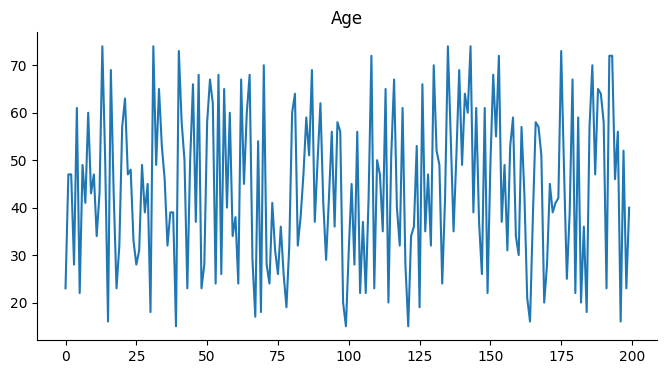

In [ ]:
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

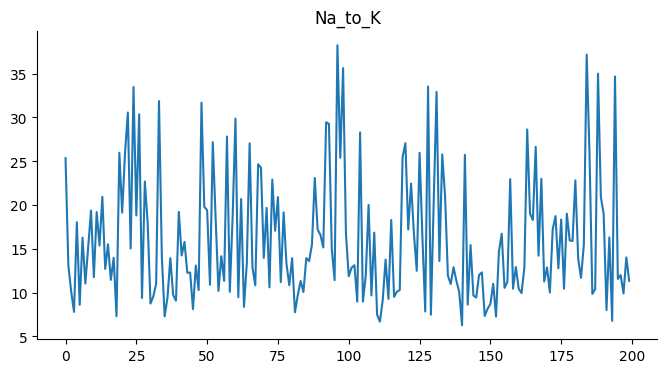

In [ ]:
df['Na_to_K'].plot(kind='line', figsize=(8, 4), title='Na_to_K')
plt.gca().spines[['top', 'right']].set_visible(False)

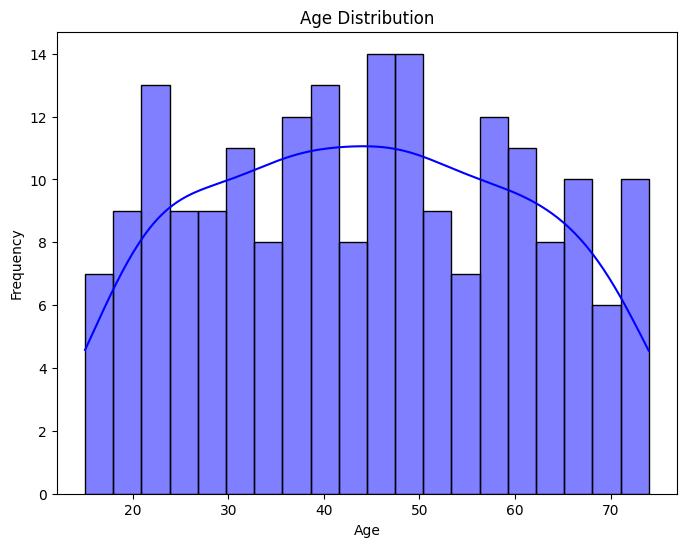

In [ ]:
# 1. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


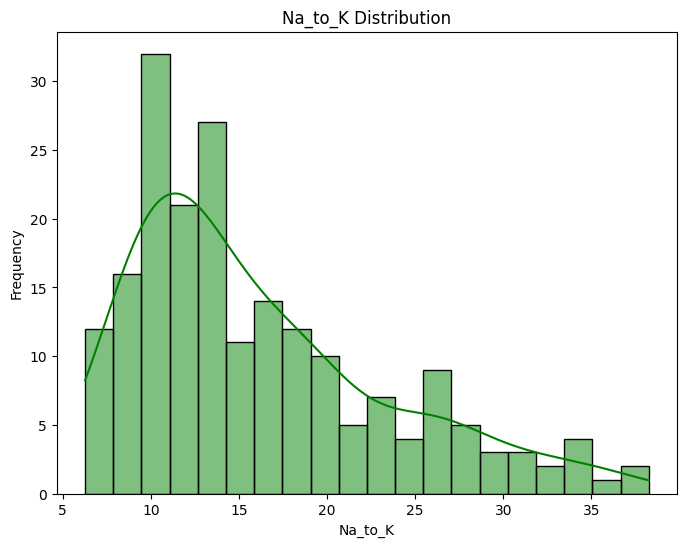

In [ ]:
# 2. Na_to_K Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Na_to_K'], bins=20, kde=True, color='green')
plt.title("Na_to_K Distribution")
plt.xlabel("Na_to_K")
plt.ylabel("Frequency")
plt.show()

<ipython-input-19-e96cfc2ea9ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Drug', data=df, palette="viridis")


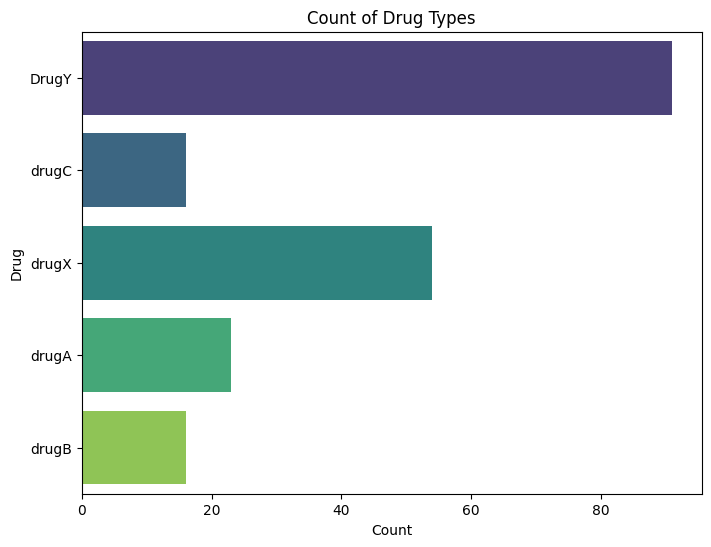

In [ ]:
# 3. Count of Drugs
plt.figure(figsize=(8, 6))
sns.countplot(y='Drug', data=df, palette="viridis")
plt.title("Count of Drug Types")
plt.xlabel("Count")
plt.ylabel("Drug")
plt.show()

<ipython-input-20-df706db49d30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette="Set2")


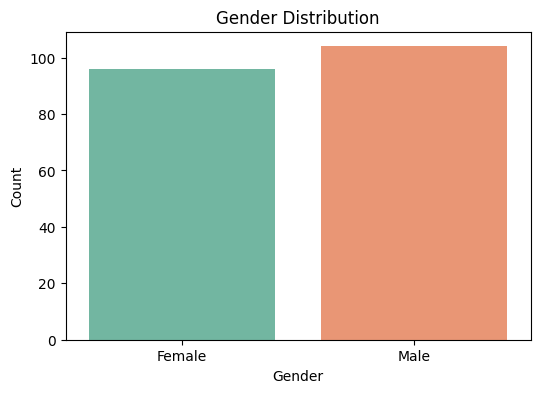

In [ ]:
# 4. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["Female", "Male"])
plt.show()

<ipython-input-21-cc13b0086c27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=df, palette="coolwarm")


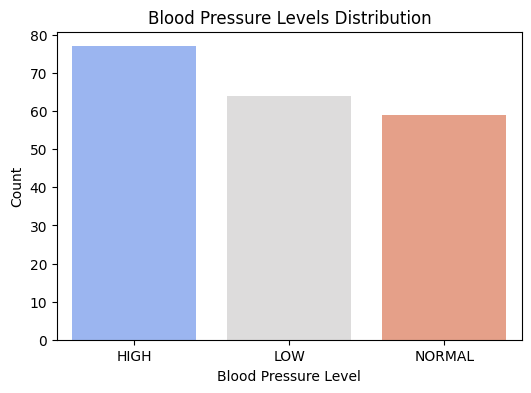

In [ ]:
# 5. BP Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='BP', data=df, palette="coolwarm")
plt.title("Blood Pressure Levels Distribution")
plt.xlabel("Blood Pressure Level")
plt.ylabel("Count")
plt.show()

<ipython-input-22-4edd81e015b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette="magma")


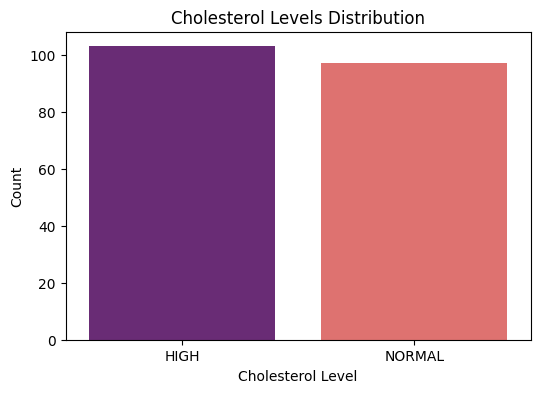

In [ ]:
# 6. Cholesterol Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Cholesterol', data=df, palette="magma")
plt.title("Cholesterol Levels Distribution")
plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.show()

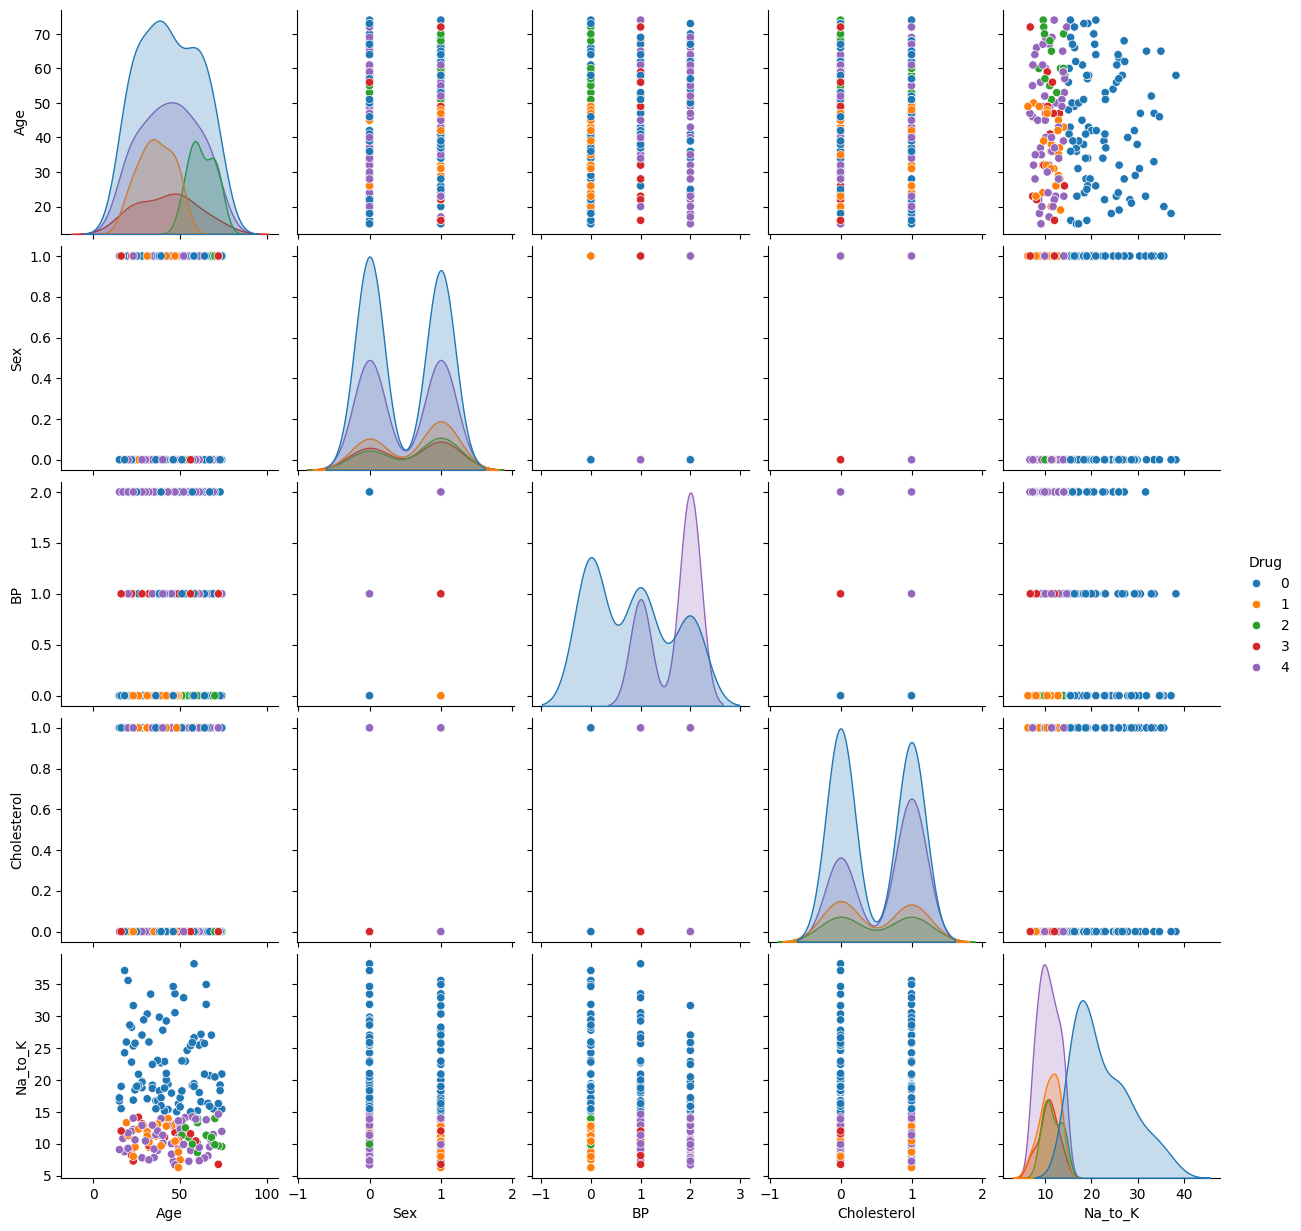

In [ ]:
# 7. Pairplot for Relationships
sns.pairplot(df, hue="Drug", diag_kind="kde", palette="tab10")
plt.show()

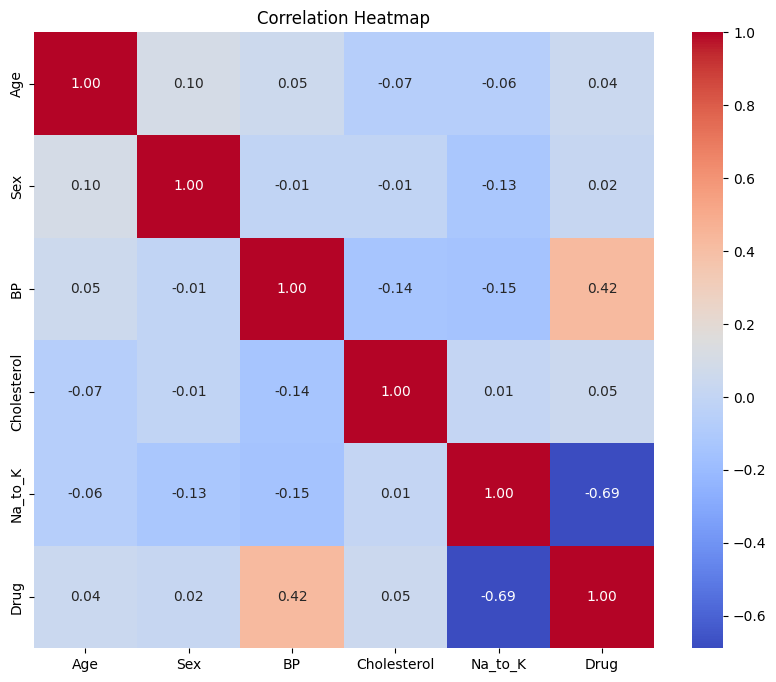

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



<ipython-input-27-339dcad81d14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug', y='Age', data=df, palette="Set3")


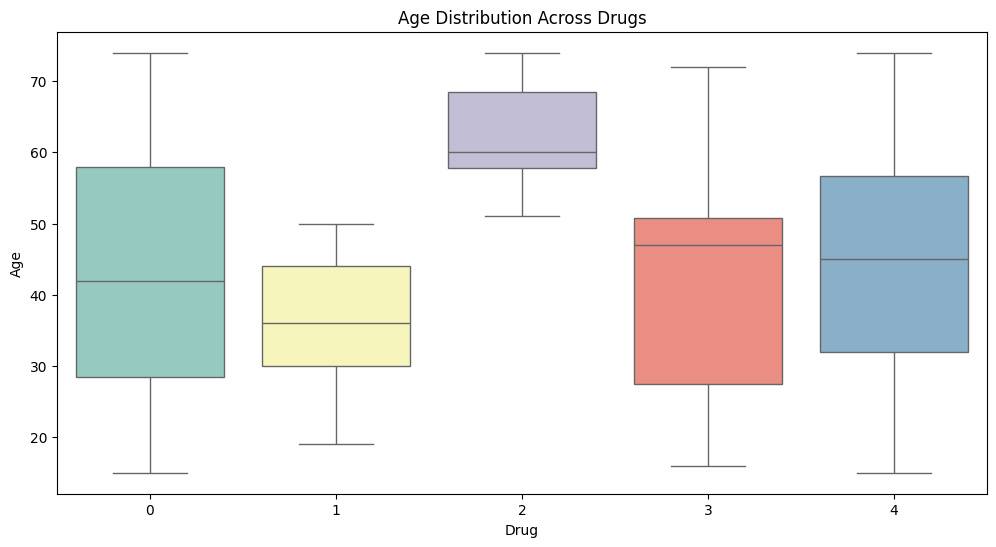

In [ ]:
# 9. Boxplot for Age and Na_to_K by Drug
plt.figure(figsize=(12, 6))
sns.boxplot(x='Drug', y='Age', data=df, palette="Set3")
plt.title("Age Distribution Across Drugs")
plt.xlabel("Drug")
plt.ylabel("Age")
plt.show()

<ipython-input-28-4667947fbf21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug', y='Na_to_K', data=df, palette="Set3")


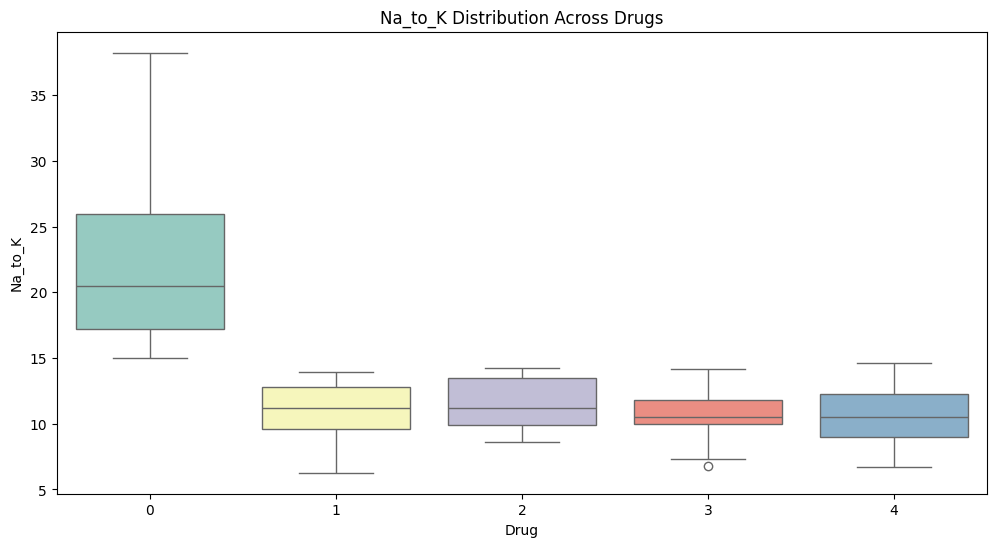

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Drug', y='Na_to_K', data=df, palette="Set3")
plt.title("Na_to_K Distribution Across Drugs")
plt.xlabel("Drug")
plt.ylabel("Na_to_K")
plt.show()

# **model**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    Accuracy  Precision  Recall  F1 Score
Max Voting             1.000   1.000000   1.000  1.000000
Averaging              1.000   1.000000   1.000  1.000000
Weighted Averaging     1.000   1.000000   1.000  1.000000
Bagging                1.000   1.000000   1.000  1.000000
Random Forest          1.000   1.000000   1.000  1.000000
Gradient Boosting      1.000   1.000000   1.000  1.000000
Stacking               1.000   1.000000   1.000  1.000000
XGBoost                0.975   0.977083   0.975  0.974155
AdaBoost               0.800   0.664062   0.800  0.719074
The best technique is: Max Voting with an accuracy of 1.00


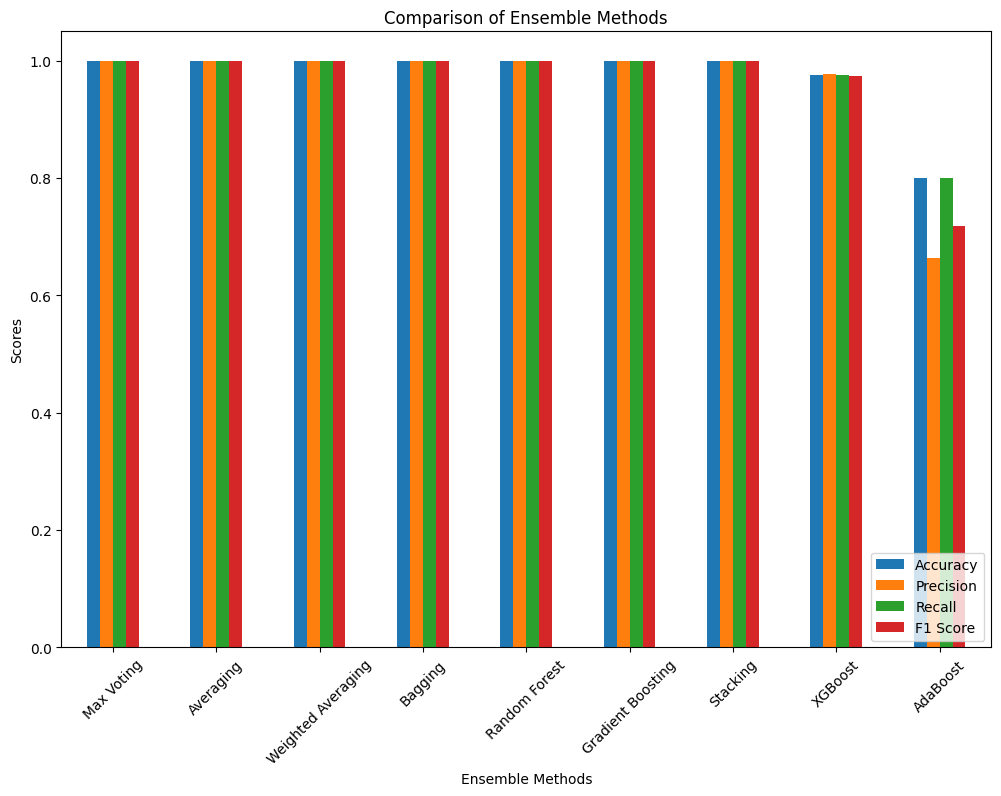

In [ ]:
# Data preprocessing
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['Drug'])
y = df['Drug']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 1: Initialize classifiers
clf1 = LogisticRegression(max_iter=300, solver='saga', random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

# Train classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

# Step 2: Basic Ensemble - Max Voting
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

# Max Voting
final_pred = np.array([np.argmax(np.bincount([p1, p2, p3])) for p1, p2, p3 in zip(pred1, pred2, pred3)])


# Averaging
avg_pred_prob = (clf1.predict_proba(X_test) + clf2.predict_proba(X_test) + clf3.predict_proba(X_test)) / 3
avg_pred = np.argmax(avg_pred_prob, axis=1)

# Weighted Averaging
weights = [0.4, 0.35, 0.25]  # Weights assigned based on classifier performance
weighted_avg_pred_prob = (
    weights[0] * clf1.predict_proba(X_test) +
    weights[1] * clf2.predict_proba(X_test) +
    weights[2] * clf3.predict_proba(X_test)
)
weighted_avg_pred = np.argmax(weighted_avg_pred_prob, axis=1)



# Step 3: Advanced Techniques
# Bagging
# takes a majority vote in classification
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
bagging_pred = bag_clf.predict(X_test)


# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)


# AdaBoost
# works by sequentially adjusts the weights
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)


# Gradient Boosting
# corrects the residual errors of the previous models
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)


# XGBoost
# handle regularization
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)


# Stacking
stack_clf = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    final_estimator=LogisticRegression()
)
stack_clf.fit(X_train, y_train)
stack_pred = stack_clf.predict(X_test)




# Evaluate Averaging and Weighted Averaging
metrics = {}

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

# Add models to metrics
metrics['Max Voting'] = evaluate_model(y_test, final_pred)
metrics['Averaging'] = evaluate_model(y_test, avg_pred)
metrics['Weighted Averaging'] = evaluate_model(y_test, weighted_avg_pred)
metrics['Bagging'] = evaluate_model(y_test, bagging_pred)
metrics['Random Forest'] = evaluate_model(y_test, rf_pred)
metrics['Gradient Boosting'] = evaluate_model(y_test, gb_pred)
metrics['Stacking'] = evaluate_model(y_test, stack_pred)
metrics['XGBoost'] = evaluate_model(y_test, xgb_pred)
metrics['AdaBoost'] = evaluate_model(y_test, ada_pred)


# Convert results to a DataFrame for better readability
metrics_df = pd.DataFrame(metrics).T  # Transpose for better readability
print(metrics_df)

# Determine the best technique
best_technique = metrics_df['Accuracy'].idxmax()
print(f"The best technique is: {best_technique} with an accuracy of {metrics_df.loc[best_technique, 'Accuracy']:.2f}")

# Visualization of metrics
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Ensemble Methods')
plt.ylabel('Scores')
plt.xlabel('Ensemble Methods')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()